PROBLEM 2 : Kosarak Association Rules

In [ ]:
%%timeit
lst = []
with open("kosarak.dat", 'r') as datFile:
    for data in datFile:
      s = ''
      val = sorted(set(data.split()), key=int)
      for i in val:
        s = s + ' ' + str(int(i)-1) + ' ' + '1,'
      s = '{'+s[1:-1] + '}\n'
      lst.append(s)
with open('korsarak.arff', 'w') as f:
  f.write('@relation korsarak\n')
  for i in range(41270):
    f.write('@attribute '+str(i+1)+' numeric\n')
  f.write('@data\n')
  f.writelines(lst)

1 loop, best of 5: 10 s per loop


B) On average to convert dat file to arff it takes 10sec

C) On average to upload the file to weka it takes 10sec

D) FPGrowth found 2 rules (displaying top 2)

1. [11=1, 218=1, 148=1]: 50098 ==> [6=1]: 49866   <conf:(1)> lift:(1.64) lev:(0.02) conv:(84.4) 
2. [11=1, 148=1]: 55759 ==> [6=1]: 55230   <conf:(0.99)> lift:(1.63) lev:(0.02) conv:(41.3) 

E) The time for algorithm to run was 4 sec on average over 5 runs. In comparison the total time to convert and upload was 20sec, that is 5 time more

PROBLEM 3 MNIST, 20 NG . Parse, normalize features, Compute pairwaise similarity matrices

In [19]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances

In [ ]:
# 20NG TF Normalization
newsgroups_train = fetch_20newsgroups(subset='train')
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)

In [ ]:
# 20NG train cosine similarity
cosine_sim = cosine_similarity(vectors, vectors)
print(cosine_sim, cosine_sim.shape)

[[1.         0.04405974 0.11017033 ... 0.04433678 0.04457107 0.0329325 ]
 [0.04405974 1.         0.06242113 ... 0.07373268 0.06959306 0.02439956]
 [0.11017033 0.06242113 1.         ... 0.07569182 0.06214891 0.02357985]
 ...
 [0.04433678 0.07373268 0.07569182 ... 1.         0.02909961 0.00716986]
 [0.04457107 0.06959306 0.06214891 ... 0.02909961 1.         0.02428174]
 [0.0329325  0.02439956 0.02357985 ... 0.00716986 0.02428174 1.        ]] (11314, 11314)


In [ ]:
# 20NG test cosine similarity
newsgroups_test = fetch_20newsgroups(subset='test')
vectors_test = vectorizer.transform(newsgroups_test.data)
cosine_sim = cosine_similarity(vectors, vectors_test)
print(cosine_sim, cosine_sim.shape)

[[0.08332137 0.03527536 0.01853714 ... 0.08742758 0.05421031 0.06243403]
 [0.03270318 0.0265544  0.0138742  ... 0.04038842 0.05893349 0.02222038]
 [0.12736379 0.0644189  0.04219289 ... 0.1020233  0.06047534 0.07989148]
 ...
 [0.04359934 0.01646304 0.02089325 ... 0.05089863 0.02096217 0.04041883]
 [0.04901693 0.03379068 0.03787461 ... 0.05323483 0.03579556 0.07712006]
 [0.01811485 0.03240313 0.00738827 ... 0.02692533 0.01564765 0.00873507]] (11314, 7532)


In [ ]:
# 20NG train-test cosine similarity
cosine_sim = cosine_similarity(vectors_test, vectors_test)
print(cosine_sim, cosine_sim.shape)

[[1.         0.06026317 0.03807753 ... 0.09753406 0.07753718 0.04648379]
 [0.06026317 1.         0.02216763 ... 0.04269044 0.0639384  0.03240872]
 [0.03807753 0.02216763 1.         ... 0.03533053 0.0225079  0.07470526]
 ...
 [0.09753406 0.04269044 0.03533053 ... 1.         0.0552143  0.07130428]
 [0.07753718 0.0639384  0.0225079  ... 0.0552143  1.         0.05331892]
 [0.04648379 0.03240872 0.07470526 ... 0.07130428 0.05331892 1.        ]] (7532, 7532)


In [ ]:
# 20NG train Euclidean distance
euclidean_distances(vectors)

array([[0.        , 1.38270768, 1.33403873, ..., 1.3825073 , 1.38233782,
        1.39073182],
       [1.38270768, 0.        , 1.36936399, ..., 1.36107848, 1.36411652,
        1.39685392],
       [1.33403873, 1.36936399, 0.        , ..., 1.35963832, 1.36956277,
        1.39744063],
       ...,
       [1.3825073 , 1.36107848, 1.35963832, ..., 0.        , 1.39348512,
        1.40913459],
       [1.38233782, 1.36411652, 1.36956277, ..., 1.39348512, 0.        ,
        1.39693826],
       [1.39073182, 1.39685392, 1.39744063, ..., 1.40913459, 1.39693826,
        0.        ]])

In [ ]:
# 20NG test Euclidean distance
euclidean_distances(vectors_test)

array([[0.        , 1.37093897, 1.38702738, ..., 1.34347753, 1.3582804 ,
        1.38095345],
       [1.37093897, 0.        , 1.39845083, ..., 1.38369762, 1.36825553,
        1.3911084 ],
       [1.38702738, 1.39845083, 0.        , ..., 1.38900646, 1.3982075 ,
        1.36036373],
       ...,
       [1.34347753, 1.38369762, 1.38900646, ..., 0.        , 1.37461682,
        1.36286149],
       [1.3582804 , 1.36825553, 1.3982075 , ..., 1.37461682, 0.        ,
        1.37599497],
       [1.38095345, 1.3911084 , 1.36036373, ..., 1.36286149, 1.37599497,
        0.        ]])

In [ ]:
# 20NG train-test Euclidean distance
euclidean_distances(vectors, vectors_test)

array([[1.35401524, 1.38904618, 1.40104451, ..., 1.35097921, 1.375347  ,
        1.36935457],
       [1.3908967 , 1.39531043, 1.40436876, ..., 1.3853603 , 1.37190853,
        1.39841312],
       [1.32108759, 1.36790431, 1.38405716, ..., 1.34013186, 1.3707842 ,
        1.35654599],
       ...,
       [1.38304061, 1.40252413, 1.39936182, ..., 1.37775278, 1.39931257,
        1.38533835],
       [1.37911788, 1.39011461, 1.38717367, ..., 1.37605608, 1.38867162,
        1.35858745],
       [1.40134589, 1.39111241, 1.40897958, ..., 1.39504456, 1.40310538,
        1.40802339]])

In [ ]:
# 20NG train Manhattan distance
manhattan_distances(vectors)

array([[ 0.        , 13.85549874, 16.84045561, ..., 12.66360256,
        14.90240393, 13.42313463],
       [13.85549874,  0.        , 17.46950468, ..., 12.50432381,
        14.62730176, 13.65753488],
       [16.84045561, 17.46950468,  0.        , ..., 15.86021818,
        18.31807155, 17.77787686],
       ...,
       [12.66360256, 12.50432381, 15.86021818, ...,  0.        ,
        13.62591937, 12.55418146],
       [14.90240393, 14.62730176, 18.31807155, ..., 13.62591937,
         0.        , 14.60558791],
       [13.42313463, 13.65753488, 17.77787686, ..., 12.55418146,
        14.60558791,  0.        ]])

In [ ]:
# 20NG test Manhattan distance
manhattan_distances(vectors_test)

array([[ 0.        , 14.21468735, 12.35637429, ..., 14.67067487,
        12.90645112, 15.09292419],
       [14.21468735,  0.        , 13.46918923, ..., 16.12957282,
        14.2308659 , 16.0853303 ],
       [12.35637429, 13.46918923,  0.        , ..., 14.00319158,
        12.9351333 , 13.22141738],
       ...,
       [14.67067487, 16.12957282, 14.00319158, ...,  0.        ,
        15.6628088 , 16.15781529],
       [12.90645112, 14.2308659 , 12.9351333 , ..., 15.6628088 ,
         0.        , 15.14397565],
       [15.09292419, 16.0853303 , 13.22141738, ..., 16.15781529,
        15.14397565,  0.        ]])

In [ ]:
# 20NG train-test Manhattan distance
manhattan_distances(vectors, vectors_test)

array([[12.71297385, 14.7002281 , 12.93927169, ..., 14.79376611,
        13.86908769, 15.1043801 ],
       [13.95192205, 14.83970537, 12.91660796, ..., 15.45114039,
        13.96641189, 15.53087325],
       [16.41700187, 17.76034081, 16.57580749, ..., 18.38890311,
        17.56438963, 18.48815136],
       ...,
       [12.42127111, 13.55798846, 11.1795564 , ..., 13.71112457,
        13.04067468, 13.79134487],
       [14.53616317, 15.53642593, 13.32174769, ..., 16.08572709,
        15.01894496, 15.92780906],
       [13.58191679, 14.02842066, 12.44107386, ..., 15.14638017,
        13.98768356, 15.36176242]])

MINST

In [ ]:
# importing MINST dataset
from sklearn.datasets import fetch_openml, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
digits= load_digits() # small minst dataset to implement scaling and normalization
minst = fetch_openml('mnist_784') # actual dataset used in finding similarity and distances
X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = train_test_split(minst.data[:10000], minst.target[:10000], test_size = 0.2)

In [ ]:
# normalizing with 0 mean and unit variance
dig_mean = np.reshape(digits.data.mean(axis=1), (-1,1))
dig_std = np.reshape(digits.data.std(axis=1), (-1,1))
digits_zeromean_univar = (digits.data - dig_mean) / dig_std
digits_zeromean_univar[0]

array([-0.88626612, -0.88626612,  0.07837728,  1.6218067 ,  0.85009199,
       -0.69333744, -0.88626612, -0.88626612, -0.88626612, -0.88626612,
        1.6218067 ,  2.00766406,  1.04302067,  2.00766406,  0.07837728,
       -0.88626612, -0.88626612, -0.30748008,  2.00766406, -0.50040876,
       -0.88626612,  1.23594935,  0.65716331, -0.88626612, -0.88626612,
       -0.1145514 ,  1.42887803, -0.88626612, -0.88626612,  0.65716331,
        0.65716331, -0.88626612, -0.88626612,  0.07837728,  0.65716331,
       -0.88626612, -0.88626612,  0.85009199,  0.65716331, -0.88626612,
       -0.88626612, -0.1145514 ,  1.23594935, -0.88626612, -0.69333744,
        1.42887803,  0.46423463, -0.88626612, -0.88626612, -0.50040876,
        1.81473538,  0.07837728,  1.04302067,  1.42887803, -0.88626612,
       -0.88626612, -0.88626612, -0.88626612,  0.27130595,  1.6218067 ,
        1.04302067, -0.88626612, -0.88626612, -0.88626612])

<Figure size 432x288 with 0 Axes>

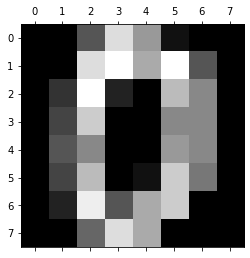

In [ ]:
img = np.reshape(digits_zeromean_univar[0], (8,8))
plt.gray()
plt.matshow(img)
plt.show()

In [ ]:
# Shift-and-scale normalization
dig_min = np.reshape(digits.data.min(axis=1), (-1,1))
dig_new = (digits.data - dig_min)
dig_max = np.reshape(dig_new.max(axis=1), (-1,1))
digits_shift_scale = dig_new/dig_max
digits_shift_scale[0]

array([0.        , 0.        , 0.33333333, 0.86666667, 0.6       ,
       0.06666667, 0.        , 0.        , 0.        , 0.        ,
       0.86666667, 1.        , 0.66666667, 1.        , 0.33333333,
       0.        , 0.        , 0.2       , 1.        , 0.13333333,
       0.        , 0.73333333, 0.53333333, 0.        , 0.        ,
       0.26666667, 0.8       , 0.        , 0.        , 0.53333333,
       0.53333333, 0.        , 0.        , 0.33333333, 0.53333333,
       0.        , 0.        , 0.6       , 0.53333333, 0.        ,
       0.        , 0.26666667, 0.73333333, 0.        , 0.06666667,
       0.8       , 0.46666667, 0.        , 0.        , 0.13333333,
       0.93333333, 0.33333333, 0.66666667, 0.8       , 0.        ,
       0.        , 0.        , 0.        , 0.4       , 0.86666667,
       0.66666667, 0.        , 0.        , 0.        ])

<Figure size 432x288 with 0 Axes>

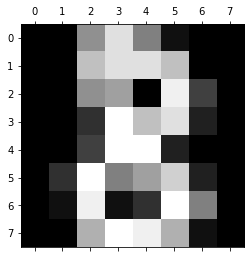

In [ ]:
img = np.reshape(digits_shift_scale[8], (8,8))
plt.gray()
plt.matshow(img)
plt.show()

In [ ]:
# MINST train cosine similarity
cosine_sim = cosine_similarity(X_train_mnist, X_train_mnist)
print(cosine_sim, cosine_sim.shape)

[[1.         0.48544571 0.31443747 ... 0.40750671 0.25894958 0.4775953 ]
 [0.48544571 1.         0.41832289 ... 0.39803778 0.38671926 0.5004291 ]
 [0.31443747 0.41832289 1.         ... 0.42896853 0.40301695 0.46133038]
 ...
 [0.40750671 0.39803778 0.42896853 ... 1.         0.31518152 0.61030537]
 [0.25894958 0.38671926 0.40301695 ... 0.31518152 1.         0.56011053]
 [0.4775953  0.5004291  0.46133038 ... 0.61030537 0.56011053 1.        ]] (8000, 8000)


In [ ]:
# MINST train cosine similarity
cosine_sim = cosine_similarity(X_test_mnist, X_test_mnist)
print(cosine_sim, cosine_sim.shape)

[[1.         0.40557955 0.36857973 ... 0.21236065 0.2935817  0.372093  ]
 [0.40557955 1.         0.31055538 ... 0.2835147  0.27776933 0.40281696]
 [0.36857973 0.31055538 1.         ... 0.44656993 0.40061686 0.49365411]
 ...
 [0.21236065 0.2835147  0.44656993 ... 1.         0.34214098 0.44460156]
 [0.2935817  0.27776933 0.40061686 ... 0.34214098 1.         0.4409534 ]
 [0.372093   0.40281696 0.49365411 ... 0.44460156 0.4409534  1.        ]] (2000, 2000)


In [ ]:
# MINST train-test cosine similarity
cosine_sim = cosine_similarity(X_train_mnist, X_test_mnist)
print(cosine_sim, cosine_sim.shape)

[[0.35281997 0.13536135 0.32864443 ... 0.34199448 0.22698638 0.31151372]
 [0.33801574 0.39202261 0.46820998 ... 0.45667518 0.43204503 0.46754231]
 [0.37960721 0.49547332 0.56192155 ... 0.29905564 0.31536006 0.47333594]
 ...
 [0.27200885 0.31937312 0.71093665 ... 0.56210754 0.33379846 0.56662556]
 [0.56038252 0.29129376 0.3975273  ... 0.28771629 0.51343518 0.46698984]
 [0.37364428 0.29434379 0.59338887 ... 0.48263877 0.67017293 0.68076644]] (8000, 2000)


In [ ]:
# MINST train Euclidean distance
euclidean_distances(X_train_mnist)

array([[   0.        , 2361.25051615, 2428.67803548, ..., 2633.12229112,
        2992.43429335, 2951.09538985],
       [2361.25051615,    0.        , 2367.93390955, ..., 2745.64910358,
        2817.64103462, 2939.13116414],
       [2428.67803548, 2367.93390955,    0.        , ..., 2461.45363556,
        2568.72886853, 2929.69093933],
       ...,
       [2633.12229112, 2745.64910358, 2461.45363556, ...,    0.        ,
        3065.9396602 , 2657.61791836],
       [2992.43429335, 2817.64103462, 2568.72886853, ..., 3065.9396602 ,
           0.        , 2834.06227878],
       [2951.09538985, 2939.13116414, 2929.69093933, ..., 2657.61791836,
        2834.06227878,    0.        ]])

In [ ]:
# MINST test Euclidean distance
euclidean_distances(X_test_mnist)

array([[   0.        , 2168.07910372, 2605.63236087, ..., 2614.40069614,
        3085.88496221, 2658.56841176],
       [2168.07910372,    0.        , 2393.688994  , ..., 2062.91104995,
        2851.50083289, 2326.3441276 ],
       [2605.63236087, 2393.688994  ,    0.        , ..., 2267.39608362,
        2891.80877653, 2433.6655481 ],
       ...,
       [2614.40069614, 2062.91104995, 2267.39608362, ...,    0.        ,
        2831.79042304, 2340.43564321],
       [3085.88496221, 2851.50083289, 2891.80877653, ..., 2831.79042304,
           0.        , 2837.01216071],
       [2658.56841176, 2326.3441276 , 2433.6655481 , ..., 2340.43564321,
        2837.01216071,    0.        ]])

In [ ]:
# MINST train-test Euclidean distance
euclidean_distances(X_train_mnist, X_test_mnist)

array([[2556.99726242, 2536.03588303, 2663.29551496, ..., 2366.38796481,
        3201.77966138, 2760.4950643 ],
       [2698.90292526, 2305.13643848, 2467.41869167, ..., 2282.43597939,
        2838.20101473, 2520.83101377],
       [2340.49652852, 1758.23462598, 2038.11089002, ..., 2228.89367176,
        2891.87205803, 2292.3494498 ],
       ...,
       [2936.25101107, 2551.88694891, 1891.22076977, ..., 2174.78711602,
        3149.28817354, 2351.90646073],
       [2335.05331845, 2659.09289044, 2768.26841184, ..., 2774.03911292,
        2727.99816715, 2650.67161301],
       [3211.05449969, 3183.21692632, 2668.53386713, ..., 2881.08729476,
        2519.45966429, 2409.4337509 ]])

In [ ]:
# MINST train Manhattan distance
manhattan_distances(X_train_mnist)

array([[    0., 27572., 28233., ..., 33453., 41819., 40036.],
       [27572.,     0., 27475., ..., 35933., 37897., 40022.],
       [28233., 27475.,     0., ..., 29520., 31594., 38875.],
       ...,
       [33453., 35933., 29520., ...,     0., 43988., 33603.],
       [41819., 37897., 31594., ..., 43988.,     0., 37719.],
       [40036., 40022., 38875., ..., 33603., 37719.,     0.]])

In [ ]:
# MINST test Manhattan distance
manhattan_distances(X_test_mnist)

array([[    0., 23221., 33100., ..., 34031., 43900., 34326.],
       [23221.,     0., 27129., ..., 22178., 36809., 26203.],
       [33100., 27129.,     0., ..., 26415., 38884., 29788.],
       ...,
       [34031., 22178., 26415., ...,     0., 38359., 28443.],
       [43900., 36809., 38884., ..., 38359.,     0., 38370.],
       [34326., 26203., 29788., ..., 28443., 38370.,     0.]])

In [ ]:
# MINST train-test Manhattan distance
manhattan_distances(X_test_mnist)

array([[    0., 23221., 33100., ..., 34031., 43900., 34326.],
       [23221.,     0., 27129., ..., 22178., 36809., 26203.],
       [33100., 27129.,     0., ..., 26415., 38884., 29788.],
       ...,
       [34031., 22178., 26415., ...,     0., 38359., 28443.],
       [43900., 36809., 38884., ..., 38359.,     0., 38370.],
       [34326., 26203., 29788., ..., 28443., 38370.,     0.]])

PROBLEM 4: MNIST, 20 NG : Train and test KNN classification (supervised)

In [ ]:
import operator
from operator import itemgetter
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

class knn:
  def __init__(self, N):
    self.N = N

  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_test):
    preds = [] 
    for x in range(len(X_test)):
        result = np.array([np.sqrt(np.sum((X_test[x] - y)**2)) for y in self.X_train])
        result = result.argsort()[:self.N]
        count = {}
        for val in result:
            if self.y_train[val] in count:
                count[self.y_train[val]] += 1
            else:
                count[self.y_train[val]] = 1
        preds.append(sorted(count.items(), key = operator.itemgetter(1), reverse=True)[0][0]) 
    return preds

In [ ]:
# converting MINST data to numpy format
X_train = np.array(X_train_mnist)
X_test = np.array(X_test_mnist)
y_train = np.array(y_train_mnist)
y_test = np.array(y_test_mnist)

In [ ]:
# KNN for MINST
knn = knn(3) 
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_train)

In [ ]:
# MINST train Metrics
precision, recall, fscore, _ = precision_recall_fscore_support(y_train, y_pred)
print("F-score\n", fscore, '\nRecall\n', recall, '\nPrecision\n', precision)
train_accuracy = accuracy_score(y_train, y_pred)
print("The training accuracy is:", train_accuracy)

F-score
 [0.99436443 0.9779978  0.97853535 0.97329377 0.97922078 0.97647059
 0.98511166 0.98106713 0.97181208 0.96626353] 
Recall
 [0.99874214 0.99663677 0.96996245 0.97387173 0.96915167 0.96934307
 0.9925     0.98502304 0.95263158 0.97183099] 
Precision
 [0.99002494 0.9600432  0.98726115 0.97271649 0.98950131 0.9837037
 0.97783251 0.97714286 0.99178082 0.96075949]
The training accuracy is: 0.9785


In [ ]:
# MINST Test Metrics
y_pred_test = knn.predict(X_test)
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred_test)
print("F-score\n", fscore, '\nRecall\n', recall, '\nPrecision\n', precision)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("The test accuracy is:", test_accuracy)

F-score
 [0.98067633 0.95833333 0.95466667 0.96605744 0.97014925 0.93593315
 0.98604651 0.94607843 0.93447293 0.92964824] 
Recall
 [0.98543689 0.9787234  0.93229167 0.97368421 0.96534653 0.94382022
 0.99065421 0.95544554 0.89130435 0.93908629] 
Precision
 [0.97596154 0.93877551 0.97814208 0.95854922 0.975      0.9281768
 0.98148148 0.9368932  0.98203593 0.92039801]
The test accuracy is: 0.957


In [23]:
# 20NG KNN
train = fetch_20newsgroups(subset='train')
test = fetch_20newsgroups(subset = 'test')
vectorizer_tfidf = TfidfVectorizer(sublinear_tf = True, smooth_idf = True, max_df = 0.5)
vector_train = vectorizer_tfidf.fit_transform(train.data)
vector_test = vectorizer_tfidf.transform(test.data)
cs_train = cosine_similarity(vector_train, vector_train)
cs_test = cosine_similarity(vector_test, vector_train)

In [24]:
# 20NG KNN Train
target = 0
for i in range(len(train.data)):
  neighbors = np.argsort(cs_train[i])[:-7:-1].tolist()
  labels = train.target[neighbors].tolist()
  n_top = max(labels, key = labels.count)
  y = train.target[i]
  if y == n_top:
    target += 1
accuracy = target/len(train.target)
print("Training accuracy(n=6)", accuracy)

Training accuracy(n=6) 0.9223970302280361


In [25]:
# 20NG KNN Test
target = 0
for i in range(len(test.data)):
  neighbors = np.argsort(cs_test[i])[:-7:-1].tolist()
  labels = train.target[neighbors].tolist()
  n_top = max(labels, key = labels.count)
  y = test.target[i]
  if y == n_top:
    target += 1
accuracy = target/len(test.target)
print("Test accuracy(n=6)", accuracy)

Test accuracy(n=6) 0.733271375464684
